<div><img src="logo.gif" width="220" ALIGN="left" border="20"></div>
<center><font color="4466ff"> <h1>AutoCV Starting Kit </h1> </font></center>
<br>
<p>This code was tested with docker evariste/autodl:dockerfile 
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS".
UNIVERSITE PARIS SUD, INRIA, CHALEARN, AND/OR OTHER ORGANIZERS
OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES.

# Introduction

* We target applications of multi-label image classification. 
* Raw data are provided, in TF record format.  
* We impose restrictions on training time and resources to push the state-of-the-art further.
* This notebook uses sample data. Download larger datasets from the website of the challenge.

In [103]:
model_dir = 'AutoDL_sample_code_submission/'      # Where the code you should submit is found (called model.py)
simple_dir = 'AutoDL_simple_baseline_models/'    # Where you find some examples of code to replace model.py
lib_dir = 'AutoDL_ingestion_program/'             # Useful libraries used on Codalab
score_dir = 'AutoDL_scoring_program/'             # Scoring program 
from sys import path; path.append(model_dir); path.append(lib_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import warnings; warnings.filterwarnings("ignore")
from os.path import join

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="background:#cfdfff">
    <h1> Step 1: Load data </h1>
<p>
We provide sample_data with the starting kit, but you may fetch other public_data from the challenge website and subtitute it to sample_data.
</div>

In [63]:
data_dir = 'AutoDL_sample_data'            # Change this directory and the dataset as needed
data_name = 'miniciao' #'miniciao' 'Monkeys' #
!ls $data_dir*

Monkeys.data	  miniciao.data      miniciao_label.name
Monkeys.solution  miniciao.solution  miniciao_public.info


In [64]:
from dataset import AutoDLDataset
D_train = AutoDLDataset(join(data_dir, data_name + '.data', "train"))
D_test = AutoDLDataset(join(data_dir, data_name + '.data', "test"))

<div style="background:#cfdfff">
    <h1> Step 2: Exploratory data analysis </h1>
    <br>
    <font color="ff0000"> THIS NEEDS MORE EXAMPLES OF DATA VISUALIZATION. T-SNE? We also need to show the TEXT labels.</font>
</div>


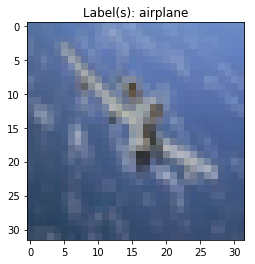

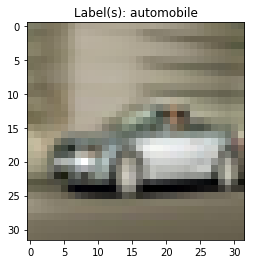

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [71]:
D_train.show_image(1)
D_train.show_image(11)

In [114]:
class_labels=D_train.get_class_labels()
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<div style="background:#cfdfff">
    <h1>Step 3: Building a predictive model</h1>
    <p>
We provide a simple example of predictive model in the `AutoDL_sample_code_submission/` directory. You can change it to another example by copying other examples from AutoDL_simple_baseline_models.
</div>

In [140]:
my_chosen_model = join(simple_dir, '2dcnn.py')  # all_zero.py, linear.py, or 2dcnn.py
my_submitted_model = join(model_dir, 'model.py') # submitted models must be called model.py
!cp $my_chosen_model $my_submitted_model
!rm -r checkpoints*                              # clean up previous models

In [141]:
from model import Model
??Model
time_budget=100
M = Model(D_train.get_metadata())

[autoreload of model failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.5/dist-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/usr/lib/python3.5/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 665, in exec_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "AutoDL_sample_code_submission/model.py", line 44, in <module>
    raise ValueError("You need to git clone the GitHub repo "
ValueError: You need to git clone the GitHub repo at https://github.com/tensorflow/models, at the parallel level 

MODEL INFO: 19-03-17 09:30:08 The dataset miniciao has 82 training examples and 10 classes.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_evaluation_master': '', '_eval_distribute': None, '_save_summary_steps': 100, '_model_dir': '/app/codalab/AutoDL_sample_code_submission/../checkpoints_miniciao', '_task_type': 'worker', '_train_distribute': None, '_save_checkpoints_steps': None, '_service': None, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_protocol': None, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f57557aed68>, '_global_id_in_cluster': 0, '_is_chief': True, '_device_fn': None, '_keep_checkpoint_max': 5, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
}

In [142]:
M.train(D_train.get_dataset(),
                  remaining_time_budget=time_budget)

MODEL INFO: 19-03-17 09:30:12 Begin training for another 10 steps...
MODEL INFO: 19-03-17 09:30:12 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-17 09:30:12 Tensor shape after preprocessing: (1, 32, 32, 3)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /app/codalab/AutoDL_sample_code_submission/../checkpoints_miniciao/model.ckpt.
INFO:tensorflow:loss = 193.7046, step = 1
INFO:tensorflow:Saving checkpoints for 10 into /app/codalab/AutoDL_sample_code_submission/../checkpoints_miniciao/model.ckpt.
INFO:tensorflow:Loss for final step: 121.52826.
MODEL INFO: 19-03-17 09:30:14 10 steps trained. 1.67 sec used. Now total steps trained: 10. Total time used for training: 1.67 sec. Current estimated time per step: 1.67e-01 sec.


In [143]:
prediction = M.test(D_test.get_dataset(), remaining_time_budget=time_budget)

MODEL INFO: 19-03-17 09:30:16 Model already trained for 3.658536585365854 epochs.
MODEL INFO: 19-03-17 09:30:16 Begin testing... 
MODEL INFO: 19-03-17 09:30:16 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-17 09:30:16 Tensor shape after preprocessing: (1, 32, 32, 3)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /app/codalab/AutoDL_sample_code_submission/../checkpoints_miniciao/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
MODEL INFO: 19-03-17 09:30:16 Asserting predictions have the same number of columns...
MODEL INFO: 19-03-17 09:30:16 [+] Successfully made one prediction. 0.49 sec used. Total time used for testing: 0.49 sec. Current estimated time for test: 4.92e-01 sec.


<div style="background:#cfdfff">
<h1> Step 4: Compute score </h1> 
Compute the balanced accuracy for the chosen duration. For this challenge, you will be judged on the area under the learning curve, computed for increasing training times.
</div>

In [144]:
from score import autodl_bac
from libscores import read_array
solution_file = join(data_dir, data_name + '.solution')
solution = read_array(solution_file)
current_bac = autodl_bac(solution, prediction)
print('Number of test examples: %d \n\t\t Solution \t\t\t\t\t Prediction ' % len(solution))
[print(z) for z in zip(solution, prediction)]
print("Normalized balanced accuracy (2*BAC-1) = {:.4f}.".format(current_bac))

Number of test examples: 18 
		 Solution 					 Prediction 
(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.10137313, 0.07249485, 0.03862847, 0.0009139 , 0.00066142,
       0.042797  , 0.00044565, 0.00360972, 0.00849053, 0.06926824],
      dtype=float32))
(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.2459344 , 0.18457907, 0.12159726, 0.0180882 , 0.01721023,
       0.19034034, 0.01120961, 0.05622029, 0.06102068, 0.25208798],
      dtype=float32))
(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.2318269 , 0.15950322, 0.14678834, 0.00795974, 0.00828409,
       0.14395913, 0.00757174, 0.03016639, 0.04494657, 0.21996057],
      dtype=float32))
(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.12226851, 0.1612928 , 0.06081439, 0.00639394, 0.01489176,
       0.11846327, 0.00912399, 0.02061243, 0.04477402, 0.17401539],
      dtype=float32))
(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0.07345431, 0.13754629, 0.04815096, 0.00107478, 0.003569

<div style="background:#cfdfff">
<h1> Step 5: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>AutoDL_sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
</div>

In [ ]:
!python run_local_test.py -dataset_dir=$data_dir -code_dir=$model_dir

Run baseline. Date: 02/07/2019.
SCORING INFO: 19-03-17 09:30:31 Cleaning existing score_dir: /app/codalab/AutoDL_scoring_output
Traceback (most recent call last):
  File "/app/codalab/AutoDL_ingestion_program/ingestion.py", line 238, in <module>
    import model # participants' model.py
  File "AutoDL_sample_code_submission/model.py", line 44, in <module>
    raise ValueError("You need to git clone the GitHub repo "
ValueError: You need to git clone the GitHub repo at https://github.com/tensorflow/models, at the parallel level of autodl repo.


<div style="background:#cfdfff">
    <h1> Preparing the submission </h1>

Zip the contents of `AutoDL_sample_code_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.
</div>

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = 'sample_code_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
print("Submit these file: " + sample_code_submission)